# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as sk_pp
from sklearn.model_selection import train_test_split

%matplotlib inline

## Get Data

In [2]:
data = pd.read_csv('../../../Data_AA2/bank-additional-full.csv', sep = ';',na_values="unknown")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [5]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
def age(df):
    df.loc[df['age'] <= 19, 'age'] = 1
    df.loc[(df['age'] > 19) & (df['age'] <= 30), 'age'] = 2
    df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age'] = 3
    df.loc[(df['age'] > 60) & (df['age'] <= 98), 'age'] = 4
           
    return df

age(data)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,3,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,3,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['job'] = le.fit_transform(data['job']) 
data['marital'] = le.fit_transform(data['marital']) 
data['education'] = le.fit_transform(data['education']) 
data['default'] = le.fit_transform(data['default']) 
data['housing'] = le.fit_transform(data['housing']) 
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact']) 
data['month'] = le.fit_transform(data['month']) 
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])

data['y'].replace(['no', 'yes'], [0,1], inplace  = True)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,3,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,2,9,2,5,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
11,2,7,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
12,2,1,2,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
13,3,3,0,0,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
from sklearn.model_selection import train_test_split

data_Y = data['y']
data = data.drop(columns=['y']) 

X_train, X_test, Y_train, Y_test = train_test_split( data, data_Y, test_size=0.30)

#Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
#Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

X_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.404098,-0.755894,-0.307668,-1.423818,-0.011857,0.918973,-0.430673,1.425874,-0.107763,-0.729772,-0.468537,2.007734,0.215368,-0.371585,0.189030,0.919365,1.610546,-0.248301,0.796564,0.899582
1,0.404098,-0.755894,-0.307668,-1.925969,-0.011857,0.918973,-0.430673,1.425874,-0.526896,1.419461,-1.275498,-0.558111,0.215368,-0.371585,0.189030,0.919365,0.677547,-0.435917,0.851047,0.899582
2,2.652238,0.351091,-0.307668,-0.419515,-0.011857,0.918973,-0.430673,-0.701324,-1.784292,1.419461,-0.468537,-0.191562,0.215368,-0.371585,0.189030,-1.064155,-0.760328,-1.353149,-1.141252,-0.811872
3,-1.844041,-1.032641,1.300054,-0.419515,-0.011857,0.918973,-0.430673,1.425874,-0.526896,0.703050,0.338424,6.772876,0.215368,-0.371585,0.189030,0.919365,0.677547,-0.435917,0.850485,0.899582
4,0.404098,-1.032641,-0.307668,-0.419515,-0.011857,0.918973,-0.430673,-0.701324,1.149633,1.419461,-0.468537,-0.558111,0.215368,-0.371585,0.189030,-0.010410,-0.547120,-0.289993,0.378108,0.471055
5,0.404098,-1.032641,-0.307668,1.086940,-0.011857,-1.088171,-0.430673,-0.701324,-1.784292,-1.446182,0.338424,0.174987,0.215368,-0.371585,0.189030,-1.064155,-0.760328,-1.353149,-1.146869,-0.811872
6,0.404098,-1.032641,-0.307668,1.086940,-0.011857,-1.088171,-0.430673,1.425874,-0.526896,-0.729772,0.338424,-0.191562,0.215368,-0.371585,0.189030,0.919365,0.677547,-0.435917,0.849924,0.899582
7,0.404098,-0.755894,-0.307668,-1.925969,-0.011857,-1.088171,-0.430673,-0.701324,-1.365160,1.419461,-0.468537,-0.191562,0.215368,-0.371585,0.189030,0.919365,-0.130938,0.939931,0.853856,0.899582
8,0.404098,0.904583,1.300054,-0.419515,-0.011857,0.918973,-0.430673,1.425874,0.730501,-0.013361,1.952345,-0.558111,0.215368,-0.371585,0.189030,0.733410,0.807178,0.877392,0.790947,0.407373
9,0.404098,-0.479148,1.300054,1.086940,-0.011857,0.918973,-0.430673,-0.701324,0.730501,1.419461,0.338424,0.174987,0.215368,1.514711,-2.406908,-1.064155,-1.070759,-1.165533,-1.216518,-0.811872


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             21341 non-null  float64
 1   job             21341 non-null  float64
 2   marital         21341 non-null  float64
 3   education       21341 non-null  float64
 4   default         21341 non-null  float64
 5   housing         21341 non-null  float64
 6   loan            21341 non-null  float64
 7   contact         21341 non-null  float64
 8   month           21341 non-null  float64
 9   day_of_week     21341 non-null  float64
 10  duration        21341 non-null  float64
 11  campaign        21341 non-null  float64
 12  pdays           21341 non-null  float64
 13  previous        21341 non-null  float64
 14  poutcome        21341 non-null  float64
 15  emp.var.rate    21341 non-null  float64
 16  cons.price.idx  21341 non-null  float64
 17  cons.conf.idx   21341 non-null 

In [11]:
Y_train.value_counts()

0    18597
1     2744
Name: y, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

strategy = {1:5000}
sm = SMOTE(random_state = 2,sampling_strategy=strategy)

X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [13]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

In [14]:
Y_train.value_counts()

1    5000
0    5000
Name: y, dtype: int64

In [15]:
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
X_train.shape

(10000, 1, 20)

In [16]:
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

In [17]:
X_val, partial_X_train, Y_val, partial_Y_train = train_test_split( X_train, Y_train, test_size=0.50)

# DNN modelo 5
Defining the model structure

In [18]:
from tensorflow.keras import models, layers

from tensorflow.keras import models, layers
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing import sequence

model = models.Sequential()
model.add(layers.Dense(32,input_shape=(partial_X_train.shape[1], partial_X_train.shape[2]), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_1.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
10/10 [==============================] - 2s 140ms/step - loss: 0.6590 - acc: 0.5607 - val_loss: 0.5895 - val_acc: 0.6918
Epoch 2/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5790 - acc: 0.6912 - val_loss: 0.5606 - val_acc: 0.7208
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 0.5473 - acc: 0.7115 - val_loss: 0.5393 - val_acc: 0.7284
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.5378 - acc: 0.7308 - val_loss: 0.5211 - val_acc: 0.7372
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.5221 - acc: 0.7429 - val_loss: 0.5096 - val_acc: 0.7392
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5082 - acc: 0.7455 - val_loss: 0.4958 - val_acc: 0.7508
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.5027 - acc: 0.7422 - val_loss: 0.4866 - val_acc: 0.7598
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5007 -

10/10 [==============================] - 0s 8ms/step - loss: 0.3891 - acc: 0.8211 - val_loss: 0.4090 - val_acc: 0.8132
Epoch 64/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3957 - acc: 0.8147 - val_loss: 0.4047 - val_acc: 0.8148
Epoch 65/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4022 - acc: 0.8205 - val_loss: 0.4076 - val_acc: 0.8112
Epoch 66/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3875 - acc: 0.8217 - val_loss: 0.4096 - val_acc: 0.8110
Epoch 67/200
10/10 [==============================] - 0s 8ms/step - loss: 0.4001 - acc: 0.8150 - val_loss: 0.4138 - val_acc: 0.8060
Epoch 68/200
10/10 [==============================] - 0s 9ms/step - loss: 0.3862 - acc: 0.8222 - val_loss: 0.4012 - val_acc: 0.8188
Epoch 69/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3911 - acc: 0.8113 - val_loss: 0.4048 - val_acc: 0.8142
Epoch 70/200
10/10 [==============================] - 0s 9ms/step - loss: 0.3924 - acc: 0

In [21]:
model.load_weights('best_model_1.h5')
score = model.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.44546860456466675
Test accuracy 0.8071498870849609


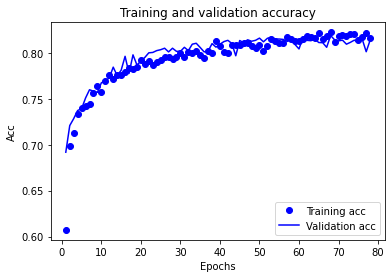

In [22]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# DNN modelo 6
Defining the model structure

In [24]:
from tensorflow.keras import models, layers

from tensorflow.keras import models, layers
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing import sequence

model2 = models.Sequential()
model2.add(layers.Dense(32,input_shape=(partial_X_train.shape[1], partial_X_train.shape[2]), activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [25]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=30)
mc = ModelCheckpoint('best_model_2.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model2.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
10/10 [==============================] - 1s 37ms/step - loss: 0.7043 - acc: 0.5472 - val_loss: 0.6530 - val_acc: 0.6138
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6364 - acc: 0.6345 - val_loss: 0.6141 - val_acc: 0.6574
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5944 - acc: 0.6777 - val_loss: 0.5875 - val_acc: 0.6866
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5760 - acc: 0.6888 - val_loss: 0.5665 - val_acc: 0.7032
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5514 - acc: 0.7164 - val_loss: 0.5500 - val_acc: 0.7202
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5341 - acc: 0.7323 - val_loss: 0.5363 - val_acc: 0.7328
Epoch 7/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5218 - acc: 0.7382 - val_loss: 0.5250 - val_acc: 0.7394
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4982 - 

10/10 [==============================] - 0s 5ms/step - loss: 0.4097 - acc: 0.8063 - val_loss: 0.4188 - val_acc: 0.8092
Epoch 64/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4043 - acc: 0.8132 - val_loss: 0.4189 - val_acc: 0.8110
Epoch 65/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3943 - acc: 0.8209 - val_loss: 0.4182 - val_acc: 0.8086
Epoch 66/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4007 - acc: 0.8141 - val_loss: 0.4184 - val_acc: 0.8096
Epoch 67/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4006 - acc: 0.8107 - val_loss: 0.4178 - val_acc: 0.8088
Epoch 68/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4044 - acc: 0.8181 - val_loss: 0.4176 - val_acc: 0.8098
Epoch 69/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4012 - acc: 0.8139 - val_loss: 0.4176 - val_acc: 0.8064
Epoch 70/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3922 - acc: 0

Epoch 125/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3824 - acc: 0.8202 - val_loss: 0.4113 - val_acc: 0.8128
Epoch 126/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3787 - acc: 0.8269 - val_loss: 0.4112 - val_acc: 0.8140
Epoch 127/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3912 - acc: 0.8203 - val_loss: 0.4108 - val_acc: 0.8144
Epoch 128/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3805 - acc: 0.8231 - val_loss: 0.4116 - val_acc: 0.8138
Epoch 129/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3813 - acc: 0.8216 - val_loss: 0.4108 - val_acc: 0.8134
Epoch 130/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3823 - acc: 0.8255 - val_loss: 0.4107 - val_acc: 0.8128
Epoch 131/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3771 - acc: 0.8245 - val_loss: 0.4109 - val_acc: 0.8142
Epoch 132/200
10/10 [==============================] - 0s 7ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3799 - acc: 0.8209 - val_loss: 0.4068 - val_acc: 0.8146
Epoch 187/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3718 - acc: 0.8308 - val_loss: 0.4070 - val_acc: 0.8136
Epoch 188/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3735 - acc: 0.8244 - val_loss: 0.4074 - val_acc: 0.8134
Epoch 189/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3680 - acc: 0.8317 - val_loss: 0.4072 - val_acc: 0.8138
Epoch 190/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3794 - acc: 0.8258 - val_loss: 0.4078 - val_acc: 0.8140
Epoch 191/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3661 - acc: 0.8278 - val_loss: 0.4083 - val_acc: 0.8144
Epoch 192/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3705 - acc: 0.8285 - val_loss: 0.4072 - val_acc: 0.8132
Epoch 193/200
10/10 [==============================] - 0s 5ms/step - loss: 0.3775 -

In [27]:
model2.load_weights('best_model_2.h5')
score = model2.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.5087128281593323
Test accuracy 0.8101016879081726


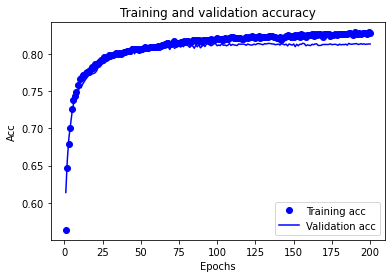

In [28]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# DNN modelo 7
Defining the model structure

In [30]:
from tensorflow.keras import models, layers

from tensorflow.keras import models, layers
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing import sequence

model3 = models.Sequential()
model3.add(layers.Dense(32,input_shape=(partial_X_train.shape[1], partial_X_train.shape[2]), activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

Training the model and plotting errors along the process

In [31]:
model3.compile(optimizer='Adamax',
              loss='binary_crossentropy',
              metrics=['acc'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', patience=30)
mc = ModelCheckpoint('best_model_3.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model3.fit(partial_X_train,
                    partial_Y_train,
                    epochs=200,
                    batch_size=512,
                    callbacks = [es,mc],
                    validation_data=(X_val, Y_val))

Epoch 1/200
10/10 [==============================] - 1s 28ms/step - loss: 0.7073 - acc: 0.4711 - val_loss: 0.6632 - val_acc: 0.5422
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6485 - acc: 0.5675 - val_loss: 0.6297 - val_acc: 0.6362
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 0.6136 - acc: 0.6580 - val_loss: 0.6051 - val_acc: 0.6932
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 0.5911 - acc: 0.7048 - val_loss: 0.5858 - val_acc: 0.7188
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5733 - acc: 0.7222 - val_loss: 0.5700 - val_acc: 0.7254
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 0.5583 - acc: 0.7350 - val_loss: 0.5566 - val_acc: 0.7314
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5439 - acc: 0.7332 - val_loss: 0.5449 - val_acc: 0.7322
Epoch 8/200
10/10 [==============================] - 0s 7ms/step - loss: 0.5303 - 

10/10 [==============================] - 0s 7ms/step - loss: 0.4003 - acc: 0.8202 - val_loss: 0.4223 - val_acc: 0.8032
Epoch 64/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4033 - acc: 0.8142 - val_loss: 0.4220 - val_acc: 0.8030
Epoch 65/200
10/10 [==============================] - 0s 7ms/step - loss: 0.4041 - acc: 0.8116 - val_loss: 0.4219 - val_acc: 0.8018
Epoch 66/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3949 - acc: 0.8201 - val_loss: 0.4215 - val_acc: 0.8038
Epoch 67/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3940 - acc: 0.8180 - val_loss: 0.4207 - val_acc: 0.8042
Epoch 68/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3899 - acc: 0.8261 - val_loss: 0.4205 - val_acc: 0.8052
Epoch 69/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3950 - acc: 0.8186 - val_loss: 0.4205 - val_acc: 0.8066
Epoch 70/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3972 - acc: 0

Epoch 125/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3725 - acc: 0.8301 - val_loss: 0.4125 - val_acc: 0.8146
Epoch 126/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3581 - acc: 0.8330 - val_loss: 0.4123 - val_acc: 0.8140
Epoch 127/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3831 - acc: 0.8219 - val_loss: 0.4125 - val_acc: 0.8136
Epoch 128/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3748 - acc: 0.8322 - val_loss: 0.4123 - val_acc: 0.8142
Epoch 129/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3749 - acc: 0.8261 - val_loss: 0.4122 - val_acc: 0.8134
Epoch 130/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3670 - acc: 0.8328 - val_loss: 0.4120 - val_acc: 0.8146
Epoch 131/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3664 - acc: 0.8304 - val_loss: 0.4122 - val_acc: 0.8144
Epoch 132/200
10/10 [==============================] - 0s 6ms/step - 

10/10 [==============================] - 0s 6ms/step - loss: 0.3636 - acc: 0.8353 - val_loss: 0.4105 - val_acc: 0.8180
Epoch 187/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3521 - acc: 0.8451 - val_loss: 0.4105 - val_acc: 0.8178
Epoch 188/200
10/10 [==============================] - 0s 6ms/step - loss: 0.3581 - acc: 0.8401 - val_loss: 0.4111 - val_acc: 0.8152
Epoch 189/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3576 - acc: 0.8400 - val_loss: 0.4106 - val_acc: 0.8188
Epoch 190/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3594 - acc: 0.8360 - val_loss: 0.4109 - val_acc: 0.8182
Epoch 191/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3582 - acc: 0.8440 - val_loss: 0.4110 - val_acc: 0.8176
Epoch 192/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3636 - acc: 0.8327 - val_loss: 0.4106 - val_acc: 0.8188
Epoch 193/200
10/10 [==============================] - 0s 7ms/step - loss: 0.3505 -

In [34]:
model3.load_weights('best_model_3.h5')
score = model3.evaluate(X_test, Y_test, verbose = 0)

print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.4994361698627472
Test accuracy 0.8193943500518799


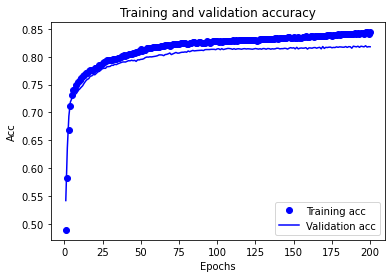

In [35]:
history_dict = history.history
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()